In [17]:
 # Dependencies

 from matplotlib import pyplot as plt
 from scipy import stats
 import matplotlib.pyplot as plt
 import numpy as np
 import pandas as pd
 import seaborn
 
 city_data = pd.read_csv("Instructions/Pyber/raw_data/city_data.csv")
 ride_data = pd.read_csv("Instructions/Pyber/raw_data/ride_data.csv")
 
    

Average Fare ($) Per City

In [18]:
# ride_data.groupby(['city','fare']).count()
avg_city_fare = ride_data.groupby('city').mean()
avg_city_fare.head()



,fare,ride_id
city,,
Alvarezhaven,23.928710,5.351586e+12
Alyssaberg,20.609615,3.536678e+12
Anitamouth,37.315556,4.195870e+12
Antoniomouth,23.625000,5.086800e+12
Aprilchester,21.981579,4.574788e+12


Total Number of Rides Per City

In [19]:
Ttl_rides = ride_data['fare'].count()
Ttl_rides

2375

In [20]:
Rides_by_city = ride_data.groupby(['city']).count()
Rides_by_city.head()

,date,fare,ride_id
city,,,
Alvarezhaven,31,31,31
Alyssaberg,26,26,26
Anitamouth,9,9,9
Antoniomouth,22,22,22
Aprilchester,19,19,19


Total Drivers by city

In [21]:
Total_Drivers = city_data.groupby(['city']).sum()
Total_Drivers.head()

,driver_count
city,
Alvarezhaven,21
Alyssaberg,67
Anitamouth,16
Antoniomouth,21
Aprilchester,49


In [22]:
Rides_by_city = ride_data.groupby(['city']).count()
Rides_by_city.head()

,date,fare,ride_id
city,,,
Alvarezhaven,31,31,31
Alyssaberg,26,26,26
Anitamouth,9,9,9
Antoniomouth,22,22,22
Aprilchester,19,19,19


In [23]:
Total_Drivers = city_data.groupby(['city']).sum()
Total_Drivers.head()

,driver_count
city,
Alvarezhaven,21
Alyssaberg,67
Anitamouth,16
Antoniomouth,21
Aprilchester,49


In [24]:
DC_Cut = city_data.loc[0,:]
DC_Cut

city            Kelseyland
driver_count            63
type                 Urban
Name: 0, dtype: object

In [25]:
# by_itemid = p_data_df.groupby('city')
# # pur_by_item = pd.DataFrame(by_itemid['city'].count()) #counts occurance of item ID by grouping by item ID
# pur_by_item.rename(columns = {"Item ID": "Number of Items Sold"}, inplace = True)
# pur_by_item
# # ttlpchsvlu = pd.DataFrame(by_itemid['Price'].sum()) # sums Price grouped by item ID
# # ttlpchsvlu.rename(columns = {"Price": "Revenue"}, inplace =True)


# # no_dup_items = p_data_df.drop_duplicates('Item ID')

In [26]:
# ttlpchsvlu
# top5_pop = no_dup_items.merge(pur_by_item, left_on = "city", right_index = True)
# # top5_pop = top5_pop.merge(ttlpchsvlu, left_on = "city", right_index = True)
# top5_pop = top5_pop.merge(Total_Drivers, left_on = "city", right_index = True)
# top5_pop = top5_pop[['city', "Item Name", "Price", "Number of Items Sold", "Revenue"]]
# top5_pop.sort_values("Number of Items Sold", ascending = False, inplace = True)
# top5_pop = top5_pop.iloc[0:6][:] # Instead of top 5 did top six because 4 items had sales of 9 items each
# top5_pop

Pivot table of Ride_Data.CSV with Data Frame

In [27]:
grouping_ride = pd.DataFrame(ride_data.pivot_table(
           index = ["city"],
           values = ["fare", "ride_id"],
           aggfunc = {"fare": np.mean,
                    "ride_id":len},
           fill_value = 0))
grouping_ride.head()

,fare,ride_id
city,,
Alvarezhaven,23.928710,31
Alyssaberg,20.609615,26
Anitamouth,37.315556,9
Antoniomouth,23.625000,22
Aprilchester,21.981579,19


Pivot Table of City_Data without Data Frame

In [28]:
####NOT A DATAFRAME!

grouping_city = city_data.pivot_table(
           index = ["city", "type"],
           values = ["driver_count"],
           aggfunc = {"driver_count": np.mean,
                    },
           fill_value = 0)
grouping_city.head()

,,driver_count
city,type,
Alvarezhaven,Urban,21
Alyssaberg,Urban,67
Anitamouth,Suburban,16
Antoniomouth,Urban,21
Aprilchester,Urban,49


Pivot Table Merge

In [29]:
grouping_city.reset_index( inplace=True)
grouping_ride.reset_index( inplace=True)
Ride_Sharing = pd.merge(grouping_ride, grouping_city, 'left', on = ["city"])
Ride_Sharing.head()

,city,fare,ride_id,type,driver_count
0,Alvarezhaven,23.928710,31,Urban,21
1,Alyssaberg,20.609615,26,Urban,67
2,Anitamouth,37.315556,9,Suburban,16
3,Antoniomouth,23.625000,22,Urban,21
4,Aprilchester,21.981579,19,Urban,49


Markdown

In [30]:
# hold on


In [31]:
Urban_Plot = Ride_Sharing.groupby('type')
Urban_Plot

In [32]:
t=pd.groupby['type'].unique()

TypeError: 'function' object is not subscriptable

In [33]:
unique_type =pd.DataFrame

In [41]:
labels = ["Urban", "Suburban", 
"Rural"]

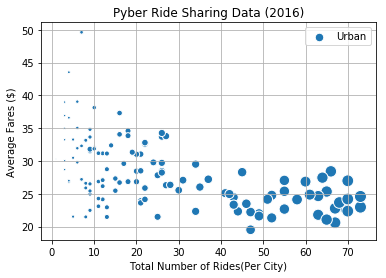

In [43]:
Ride_Sharing.plot(kind="scatter", x = 'driver_count', y = 'fare', s = Total_Drivers['driver_count'].values*2, edgecolor ='w')
plt.title('Pyber Ride Sharing Data (2016)')
plt.ylabel("Average Fares ($)")
plt.xlabel('Total Number of Rides(Per City)')
plt.legend(labels,loc="best")
plt.grid()
plt.show()